# Compression factor versus mantid file size
Mantid algorithm `CompressEvents` allows me to down sample data. Here, I first create super pixels, then group events according from a downsampled wall clock resolution and downsamples TOF resolution. The potential for compression depends on the total number of events within the resulting "Super box": as these can be replaced with a single weighted event. Here, I'll try to quantify that using three reference datasets, each with different numbers of events.

In [1]:
from mantid.simpleapi import *
import matplotlib.pyplot as plt
import numpy as np

#load datasets

#small run
#LoadEventNexus(Filename='/Users/66j/Documents/ORNL/code/nexpyTest/SNAP_52145.nxs.h5',OutputWorkspace='SNAP52145')
#medium run
#LoadEventNexus(Filename='/Users/66j/Documents/ORNL/code/nexpyTest/SNAP_53959.nxs.h5', OutputWorkspace='SNAP53959')
#large run
LoadEventNexus(Filename='/Users/66j/Documents/ORNL/code/nexpyTest/SNAP_53369.nxs.h5', OutputWorkspace='SNAP53369')

EventWorkspace
Title: Van 3 mm pin WL = 2.1 A
Histograms: 1179648
Bins: 500
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: SNAP (2018-May-01 to 2100-Jan-31)Instrument from: /Users/66j/Documents/ORNL/code/nexpyTest/SNAP_53369.nxs.h5

Parameters from: /Users/66j/miniconda3/envs/mantidenv/instrument/SNAP_Parameters.xml
Run start: 2022-Jan-18 01:57:25
Run end:  2022-Jan-18 03:28:29

Events: 1719091419

In [2]:
#Compression parameters:
delt = 60 #wall clock resolution (in seconds)
delT = 10 #TOF resolution in us
pixEdge = 8 #superPixel dimension in number of native pixels

#SumNeighbours(InputWorkspace='SNAP52145', OutputWorkspace='SNAP52145_8x8', SumX=pixEdge, SumY=pixEdge)
#CompressEvents(InputWorkspace='SNAP52145_8x8', OutputWorkspace='SNAP52145_8x8c', Tolerance=delT, WallClockTolerance=delt)

#SumNeighbours(InputWorkspace='SNAP53959', OutputWorkspace='SNAP53959_8x8', SumX=pixEdge, SumY=pixEdge)
#CompressEvents(InputWorkspace='SNAP53959_8x8', OutputWorkspace='SNAP53959_8x8c', Tolerance=delT, WallClockTolerance=delt)

SumNeighbours(InputWorkspace='SNAP53369', OutputWorkspace='SNAP53369_8x8', SumX=pixEdge, SumY=pixEdge)
DeleteWorkspace(Workspace='SNAP53369')
CompressEvents(InputWorkspace='SNAP53369_8x8', OutputWorkspace='SNAP53369_8x8c', Tolerance=delT, WallClockTolerance=delt)

EventWorkspace
Title: Van 3 mm pin WL = 2.1 A
Histograms: 18432
Bins: 500
Histogram
X axis: Time-of-flight / microsecond
Y axis: Counts
Distribution: False
Instrument: SNAP (2018-May-01 to 2100-Jan-31)Instrument from: /Users/66j/Documents/ORNL/code/nexpyTest/SNAP_53369.nxs.h5

Parameters from: /Users/66j/miniconda3/envs/mantidenv/instrument/SNAP_Parameters.xml
Run start: 2022-Jan-18 01:57:25
Run end:  2022-Jan-18 03:28:29

Events: 933793286 (weighted)

In [24]:
DeleteWorkspaces(['SNAP52145_8x8c','SNAP52145_8x8'])

In [4]:
# ws1 = mtd['SNAP52145']
# NEvNative1 = ws1.getNumberEvents()/1e6
# ws1c = mtd['SNAP52145_8x8c']
# NEvComp1 = ws1c.getNumberEvents()/1e6
# cRat1 = NEvComp1/NEvNative1
# print(f'Dataset 1 original events: {NEvNative1:.2f} MEvents, Compression ratio = {cRat1:.2f}')

# ws2 = mtd['SNAP53959']
# NEvNative2 = ws2.getNumberEvents()/1e6
# ws2c = mtd['SNAP53959_8x8c']
# NEvComp2 = ws2c.getNumberEvents()/1e6
# cRat2 = NEvComp2/NEvNative2
# print(f'Dataset 2 original events: {NEvNative2:.2f} MEvents, Compression ratio = {cRat2:.2f}')

ws3 = mtd['SNAP53369_8x8']
NEvNative3 = ws3.getNumberEvents()/1e6
ws3c = mtd['SNAP53369_8x8c']
NEvComp3 = ws3c.getNumberEvents()/1e6
cRat3 = NEvComp3/NEvNative3
#cRat3 = 0.20
print(f'Dataset 3 original events: {NEvNative3:.2f} MEvents, Compression ratio = {cRat3:.2f}')

Dataset 3 original events: 1719.09 MEvents, Compression ratio = 0.54


In [9]:
NEvNative1 = 16.38
NEvNative2 = 106.36
cRat1 = 0.98
cRat2 = 0.95

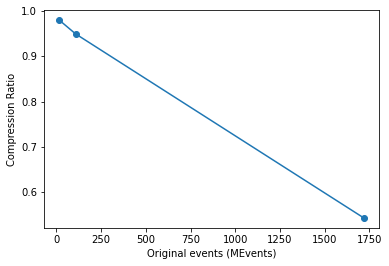

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylabel('Compression Ratio')
ax.set_xlabel('Original events (MEvents)')
line = ax.plot( [NEvNative1,NEvNative2,NEvNative3],[cRat1,cRat2,cRat3],marker='o')
plt.show()